In [51]:
import numpy as np
import urllib
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.insert(0, '../../../')
from VisionClient import *

In [52]:
label_file = open('../data/ilsvrc12/synset_words.txt', 'r')
labels = label_file.readlines();

In [77]:
client = VisionClient();
image_url = 'http://cogrob-dell-desktop.cc.gt.atl.ga.us/data/fish-bike.jpg'
prediction = client.classify(image_url);
top_class = prediction['top_class']
top_label = labels[top_class]
print 'Top Class: ', top_class, '\nTop Label: ', top_label

Top Class:  770 
Top Label:  n04120489 running shoe



In [78]:
predictions = np.array(prediction['list']) # Get the list of predictions
sorted_indices =  np.argsort(predictions); # Sorts in ascending order
sorted_indices = sorted_indices[::-1]; # Reverse it

for i in range(0,10):
    print 'Class: ', sorted_indices[i], '\tScore: ', predictions[sorted_indices[i]], '  Label: ', labels[sorted_indices[i]],


Class:  770 	Score:  0.0511932969093   Label:  n04120489 running shoe
Class:  880 	Score:  0.0370924584568   Label:  n04509417 unicycle, monocycle
Class:  870 	Score:  0.0358333997428   Label:  n04482393 tricycle, trike, velocipede
Class:  63 	Score:  0.0298974998295   Label:  n01748264 Indian cobra, Naja naja
Class:  43 	Score:  0.0263187829405   Label:  n01688243 frilled lizard, Chlamydosaurus kingi
Class:  33 	Score:  0.0256504956633   Label:  n01664065 loggerhead, loggerhead turtle, Caretta caretta
Class:  616 	Score:  0.0248749051243   Label:  n03627232 knot
Class:  394 	Score:  0.0213410928845   Label:  n02640242 sturgeon
Class:  112 	Score:  0.0212880671024   Label:  n01943899 conch
Class:  34 	Score:  0.0193452779204   Label:  n01665541 leatherback turtle, leatherback, leathery turtle, Dermochelys coriacea


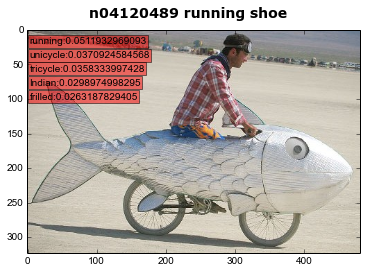

In [104]:
try:
    urllib.urlretrieve(image_url, "/tmp/image.jpg")
except:
    print '[ERROR] Invalid URL'
    
im = plt.imread("/tmp/image.jpg")
fig = plt.figure();
ax = plt.axes();

count = 1;
for i in range(0,5):
    label_text = labels[sorted_indices[i]].split(',')[0].split(' ')[1]
    text = label_text + ':' + str(predictions[sorted_indices[i]]);
    ax.text(3, count*20 + 0, text, 
        bbox={'facecolor':'red', 'alpha':0.5})   
    count = count + 1;

fig.suptitle(top_label, fontsize=14, fontweight='bold')
plt.imshow(im)
savefig('/tmp/image_annotated.png')